Imports

In [8]:
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


Loading Wine Dataset

In [9]:
wine = load_wine()
X = wine.data
y = wine.target
df = pd.DataFrame(X,columns=wine.feature_names)
df['target'] = y


Pre-processing data

In [10]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.dtype)


float64


Defining Quantile Loss function:

In [11]:
def quantile_loss(y_true,y_pred,quantile):
    error = y_true-y_pred
    return np.where(error>=0,quantile*error,(quantile-1)*error)


Gradient Descent for Quantile Loss:

In [12]:
def gradient_descent_quantile(X,y,quantile=0.5,learning_rate=0.01,epochs=1000):
    m,n = X.shape
    weights = np.zeros(n)
    bias = 0
    for epoch in range(epochs):
        y_pred = np.dot(X,weights)+bias
        error = y-y_pred
        grad_w = -np.dot(X.T, np.where(error >= 0, quantile, quantile - 1)) / m
        grad_b = -np.sum(np.where(error >= 0, quantile, quantile - 1)) / m
        weights -= learning_rate * grad_w
        bias -= learning_rate * grad_b
    return weights,bias

Training the model

In [13]:
quantile = 0.5
learning_rate = 0.01
epochs = 1000
weights,bias = gradient_descent_quantile(X_train,y_train,quantile,learning_rate,epochs)


Making predictions

In [14]:
def predict(X,w,b):
    return np.dot(X,w)+b
y_train_pred = predict(X_train, weights, bias)
y_test_pred = predict(X_test, weights, bias)

Evaluating and making plots: 

Train Loss: 0.0937
Test Loss: 0.1000


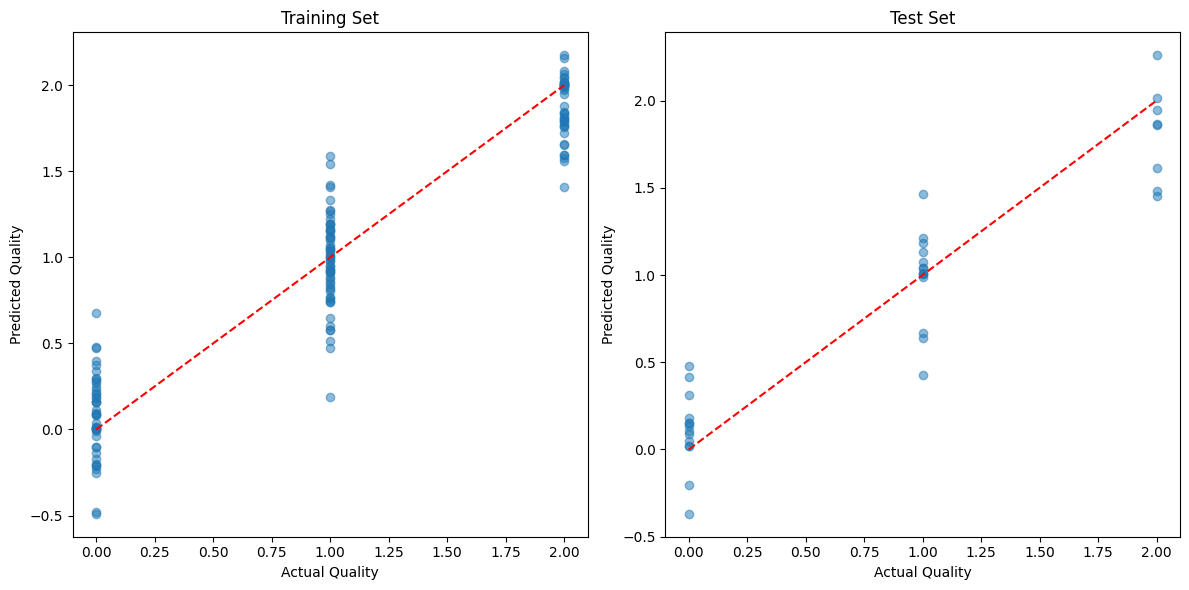

In [15]:
train_loss = np.mean(quantile_loss(y_train, y_train_pred, quantile))
test_loss = np.mean(quantile_loss(y_test, y_test_pred, quantile))
print(f'Train Loss: {train_loss:.4f}')
print(f'Test Loss: {test_loss:.4f}')
plt.figure(figsize=(12, 6))
# Training plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Training Set')
# Test plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Test Set')
plt.tight_layout()
plt.show()